# Notes
* Requires `bokeh sample data` to have been installed
    * `python -c "import bokeh.sampledata; bokeh.sampledata.download()"`
* Requires envrionment variable called `data_home` to be set
    * Create user environment variable
        * Name: `data_home`
        * Value: `~/bokeh_data`
* Restart kernel to load newly created `data_home`

* [Seaborn charts](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) provides quick visuals from dataframes
* [Correlogram](https://en.wikipedia.org/wiki/Correlogram) for interpreting autocorrelation (something must be higher/lower than 0.2/-0.2)


In [1]:
import os
import pandas as pd
import numpy as np

data_home = os.getenv('data_home')
aapl = pd.read_csv(data_home + '/aapl.csv')
aapl.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2000-03-01,118.56,132.06,118.50,130.31,38478000,31.68
1,2000-03-02,127.00,127.94,120.69,122.00,11136800,29.66


In [2]:
# lets generate returns series, drop columns of no interest for this notebook, and rename columns
aapl['month'] = pd.DatetimeIndex(aapl['Date']).month
aapl['doy'] = pd.DatetimeIndex(aapl['Date']).dayofyear
aapl['r_delta'] = np.log(aapl['Adj Close']) - np.log(aapl['Adj Close'].shift(1))
aapl['v_delta'] = np.log(aapl['Volume']) - np.log(aapl['Volume'].shift(1))

aapl.drop(labels=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1, inplace=True)
aapl.columns = ['date', 'month', 'doy', 'dr', 'dv']

df = aapl[1:]
df.head(2)

,date,month,doy,dr,dv
1,2000-03-02,3,62,-0.065886,-1.239832
2,2000-03-03,3,63,0.048051,0.037746


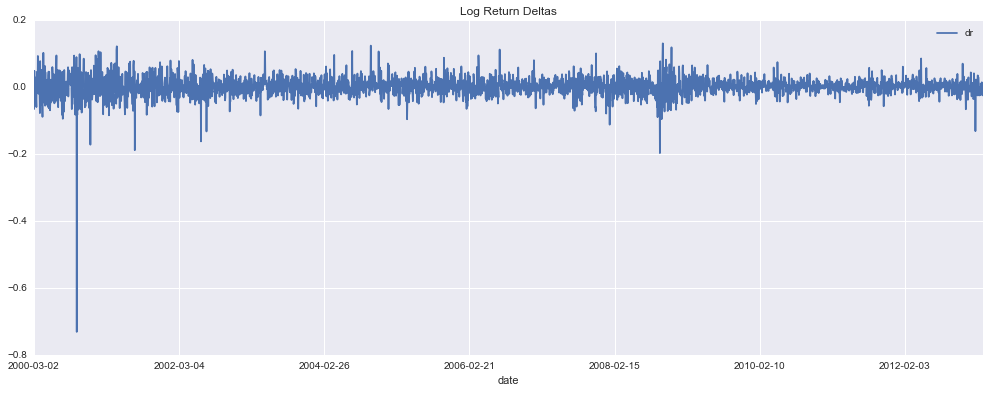

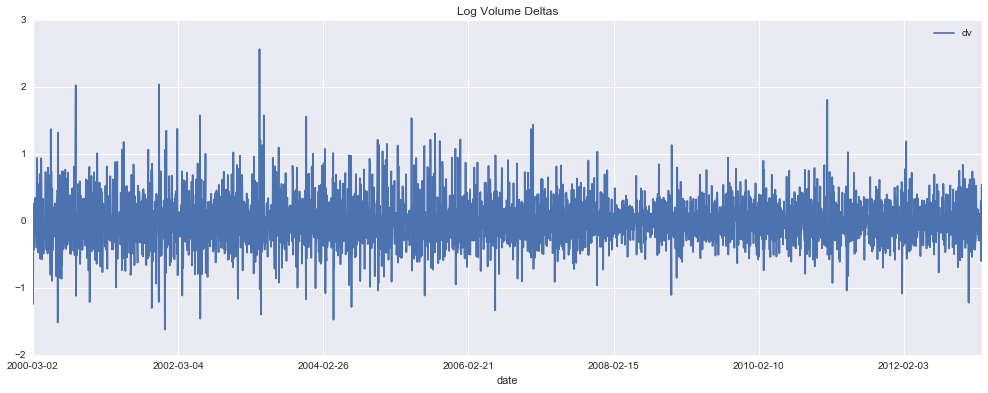

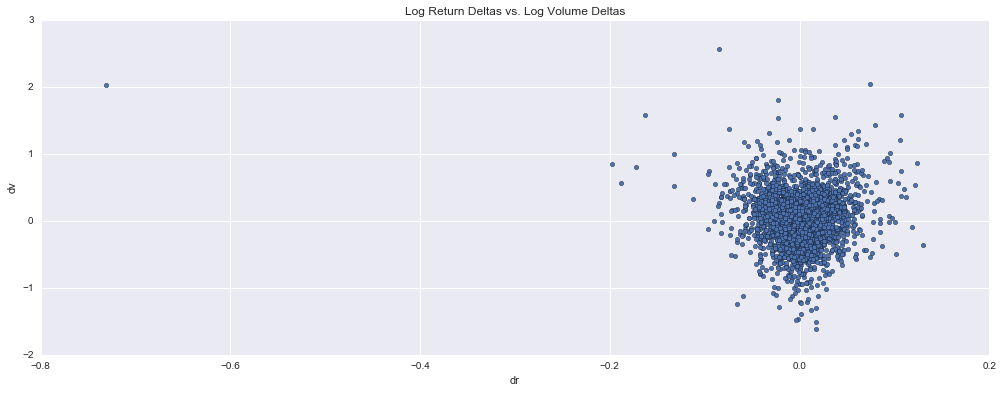

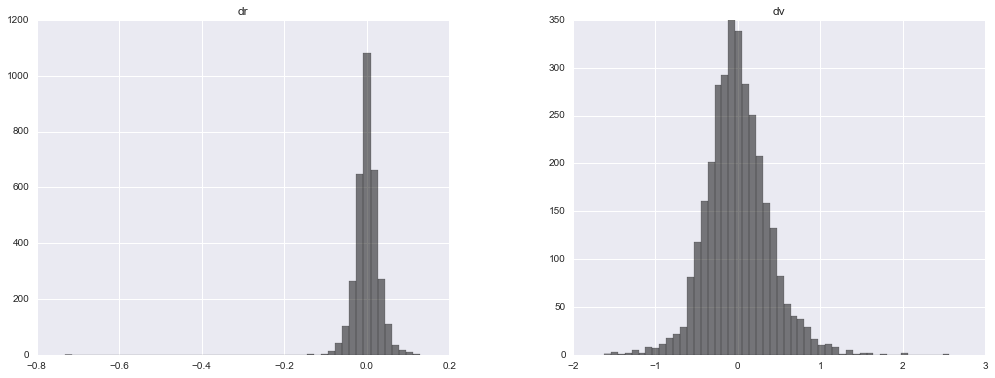

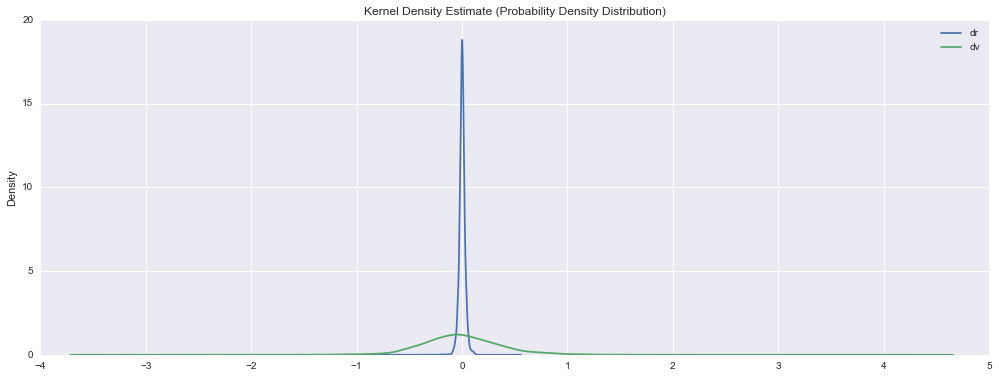

In [3]:
# what do the log return deltas and log volume deltas look like
# charts show the log returns are a mean reverting returns series, as do the log volume deltas
# i.e. there is no alpha to be found here, move along
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.plot.line(x='date',y='dr', figsize=(17,6), title="Log Return Deltas")
df.plot.line(x='date',y='dv', figsize=(17,6), title="Log Volume Deltas")
df.plot.scatter(x='dr',y='dv', figsize=(17,6), title="Log Return Deltas vs. Log Volume Deltas")
df[['dr','dv']].hist(color='k', alpha=0.5, bins=50, figsize=(17,6), layout=(1,2))
df[['dr','dv']].plot.kde(title="Kernel Density Estimate (Probability Density Distribution)", figsize=(17,6))

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([ -3.28051988e-03,   3.49792730e-03,   9.62913919e-03,
          4.67984663e-02,   1.05156329e-02,  -5.26287156e-03,
          3.88601323e-02,   1.46971257e-02,  -1.58621782e-02,
          2.34537324e-02,   1.62744100e-02,   2.64393403e-02,
         -1.08682028e-04,  -1.02312509e-02,   1.26545685e-02,
          1.02991760e-02,   1.34842328e-02,  -1.43207234e-02,
         -4.08358734e-03,   1.87405008e-03,   1.80998972e

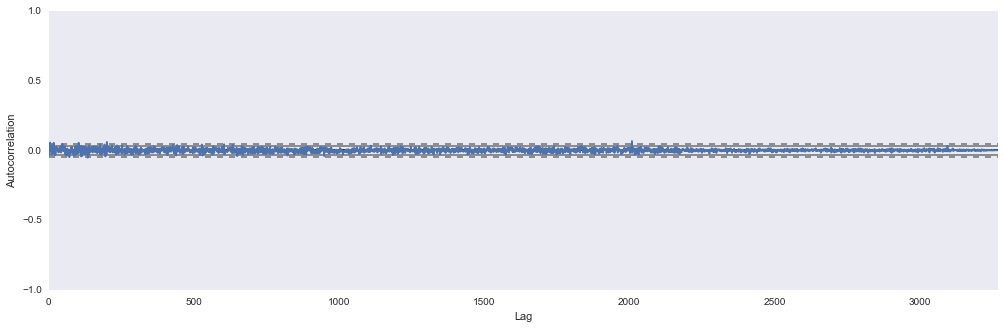

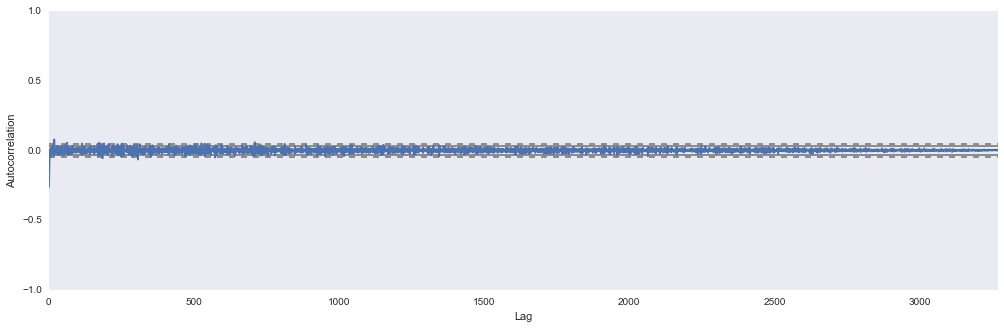

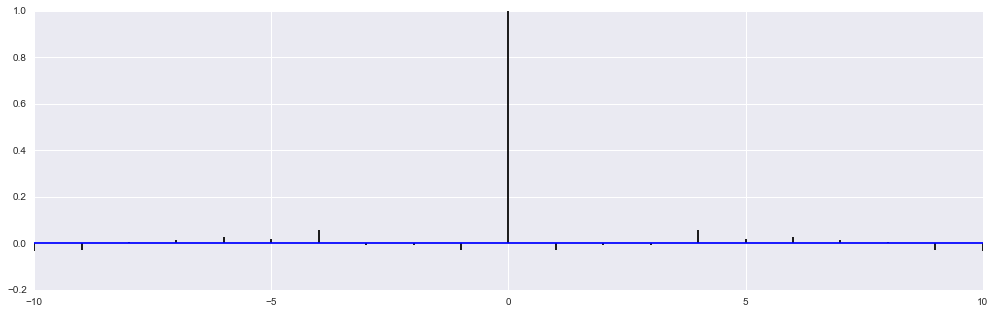

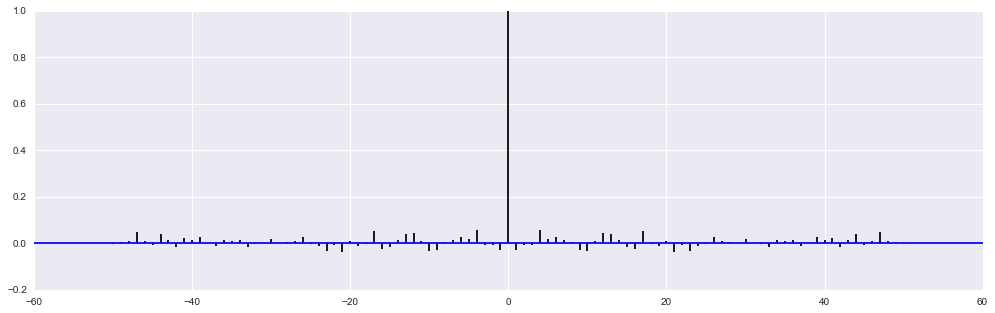

In [4]:
# is there any information in lagged retuns data (no, none whatsoever)

# use pandas plotting helper functions
# note the max number of lags (huge!)
from pandas.tools.plotting import autocorrelation_plot, lag_plot

plt.figure(figsize=(17,5))
autocorrelation_plot(df['dr'])

plt.figure(figsize=(17,5))
autocorrelation_plot(df['dv'])

# use matplotlib directly, 1st chart defaults to maxlag=10, second chart is explicitly set
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.acorr
plt.figure(figsize=(17,5))
plt.acorr(df['dr'], hold=None, data=None)

plt.figure(figsize=(17,5))
plt.acorr(df['dr'], hold=None, data=None, maxlags=50)

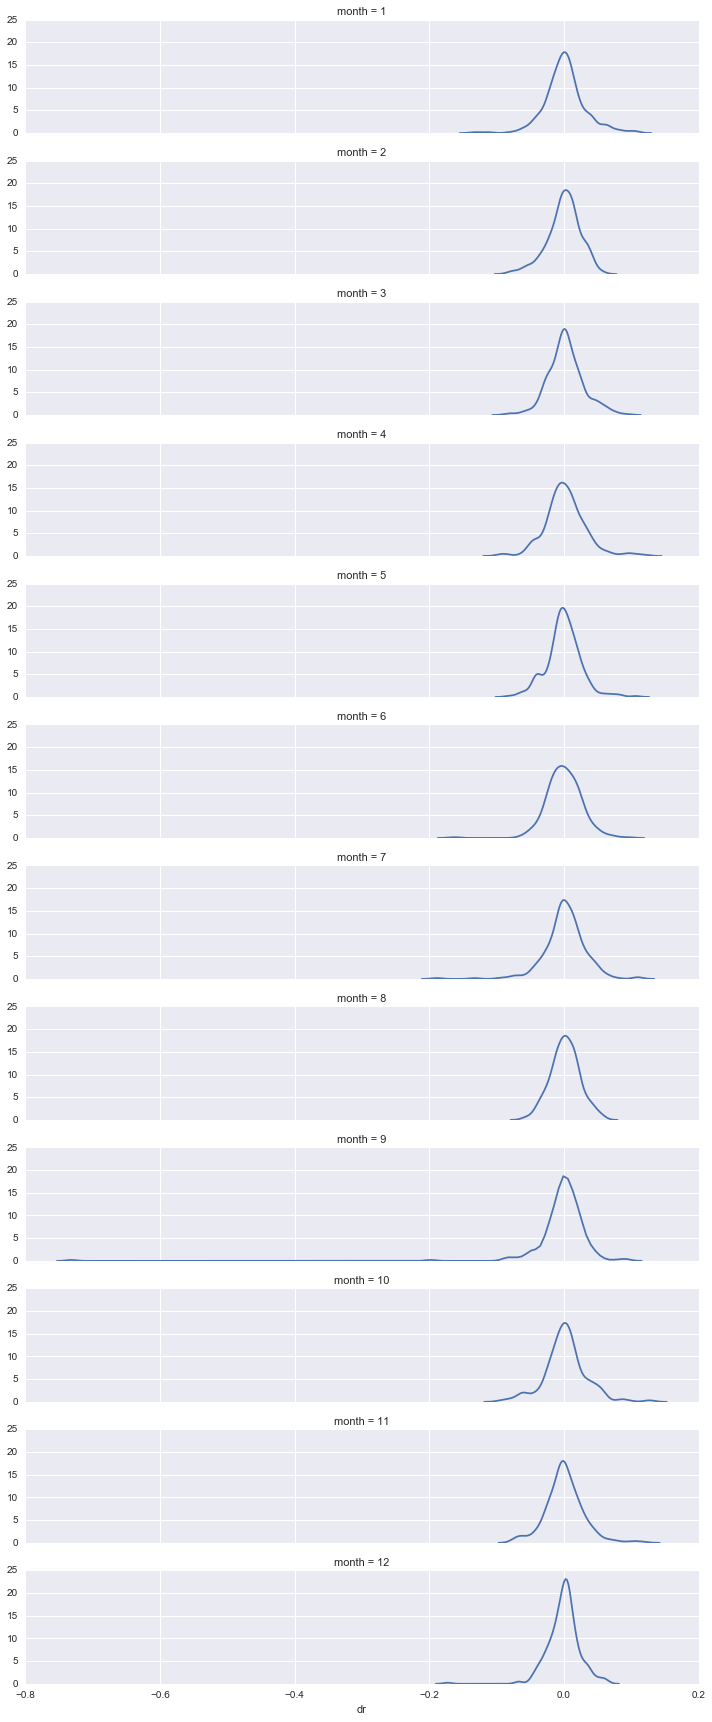

In [5]:
# review monthly affects to returns
# April: seems to have longer positive tail than others
# June/July: seem to have longer negative tail than others, perhaps selling in May is a good idea?
# October: gets a long negative tail
g = sns.FacetGrid(df, row="month", size=2, aspect=5)
g.map(sns.kdeplot, "dr")


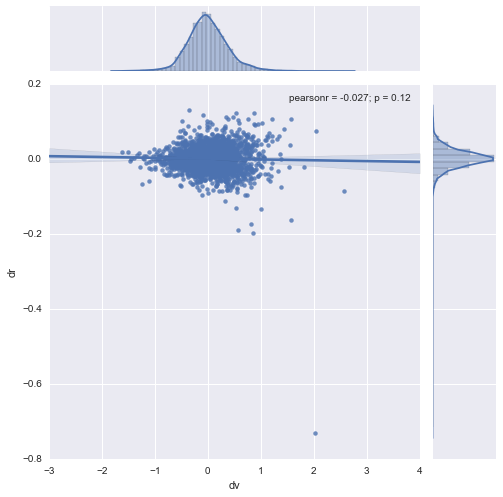

In [6]:
#  try to show there is no linear relationship between changes in volume and the change in returns 
g = sns.jointplot("dv", "dr", data=df, kind="reg", size=7)

In [13]:
df_doy = df[['doy','dr','dv']].groupby('doy').mean()

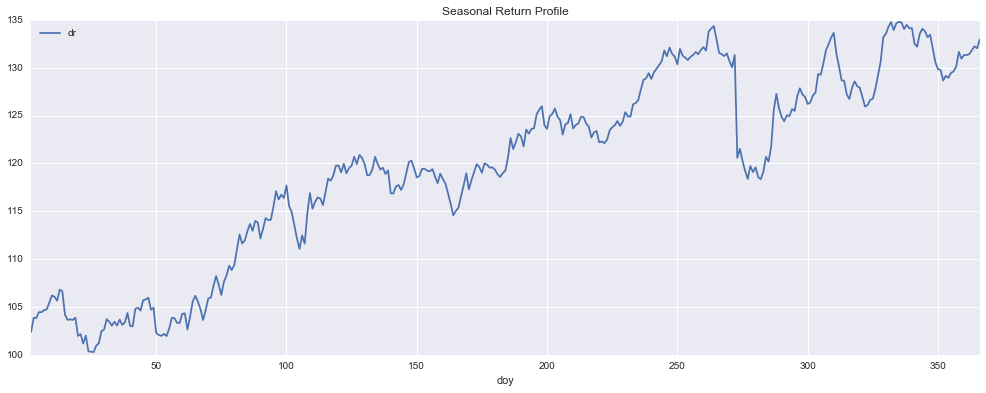

In [24]:
return_profile = (df_doy.cumsum() * 100) + 100
ax = return_profile.plot.line(y='dr', figsize=(17,6), title="Seasonal Return Profile (NASDAQ: AAPL)")
ax

In [ ]:
help(df_doy.rolling)